## Getting Ready

Now, we get to do some modeling!  It's best to start simple, therefore we'll look at linear regression first.  The Boston dataset is perfect for for playing around with regression.

In [1]:
from sklearn import datasets
boston = datasets.load_boston()

## How to do it

Actually using linear regression in Sci-Kit Learn is quite simple.  The API for linear regression is basically the same API you're now familiar with from the prior chapter.

First, import the LinearRegression object and create a class.

In [2]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

Now it's as easy as passing the independent and dependent variables to the LinearRegression's fit method.

In [3]:
lr.fit(boston.data, boston.target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Now, to get the predictions.

In [4]:
predictions = lr.predict(boston.data)

It's then probably a good idea to look at how close the predictions were to the actual data.  We can use use a histogram to look at the differences.  These are called the residuals.

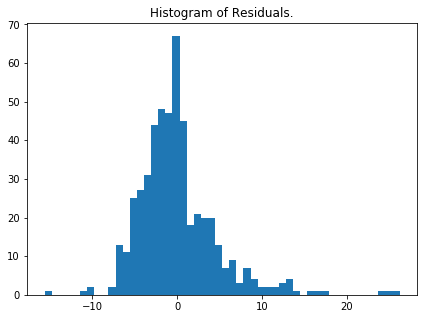

In [5]:
###don't show

%matplotlib inline
import matplotlib.pyplot as plt
f = plt.figure(figsize=(7, 5))
ax = f.add_subplot(111)
ax.hist(boston.target - predictions, bins=50)
ax.set_title("Histogram of Residuals.")
f.savefig("LinearRegression.png")

We'll talk a little bit more about how to evaluate the output of the regression in the next section.

Let's take a look at the coefficients.

In [6]:
lr.coef_

array([-1.07170557e-01,  4.63952195e-02,  2.08602395e-02,  2.68856140e+00,
       -1.77957587e+01,  3.80475246e+00,  7.51061703e-04, -1.47575880e+00,
        3.05655038e-01, -1.23293463e-02, -9.53463555e-01,  9.39251272e-03,
       -5.25466633e-01])

So going back to the data we can see which factors have a negative relationship with the outcome, and which factors have a positive relationship.  For example, and as expected, an increase in the per capita crime rate by town has a negative relationship with the price of a home in boston.

## How it works

The basic idea of Linear Regression is to find the set of coefficients, $\beta$ that statisfy, $y = X\beta$.  Where $X$ is the data matrix.  Since it's unlikely that given that values of X we can find a set of coefficients which exactly statisties the equation due to an unexact specification or measurement error, an error term is added.  Therefore, the equation becomes $y = X\beta + \epsilon$.  $\epsilon$ is assumed to be normally distributed, and independent of the X values.  Geometrically this means that the error terms are perpendictular to the X.  It's beyond the scope of this book, but it might be worth it to prove to yourself that $\epsilon X = 0$.

In order to find the set of betas which map the Xs to y we minimize the error term.  This is done by solving:

$$ \sum (y_i - X \beta)^2$$

This problem can be solved analytically, with the solution being $\hat{\beta}=(X^TX)^{-1}X^T\hat{y}$.

If you're familiar with the concept of a projection matrix you can then see that $y = P\hat{y}$ where $P = X\beta = X(X^TX)^{-1}X^T$  If you're not, the basic idea is that the projection matrix transforms the input vector to the vector space spanned by the $X$s.  Gaining an understanding of $P$ and $I - P$ are worthwhile to really grasp what regression is doing.

## There's more

The `LinearRegression` object can automatically normalize (a.k.a. scale) the inputs.

In [29]:
lr2 = LinearRegression(normalize=True)
lr2.fit(boston.data, boston.target)

LinearRegression(copy_X=True, fit_intercept=True, normalize=True)

In [30]:
predictions2 = lr2.predict(boston.data)

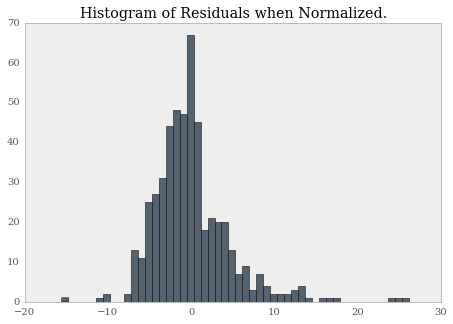

In [31]:
%matplotlib inline
import matplotlib.pyplot as plt
f = plt.figure(figsize=(7, 5))
ax = f.add_subplot(111)
ax.hist(boston.target - predictions2, bins=50)
ax.set_title("Histogram of Residuals when Normalized.")

It had no impact there, but that does not mean that it's a friviolous activity.  We're training and testing on the same dataset, but normalizing may help for new data, it will also be extremely important when we start dealing with scale varient techniques like SVM.